* ### Web Graph - A directed graph, whose nodes correspond to the pages of the WWW, and a directed edge connects page X to page Y if there exists a hyperlink on page X, referring to page Y.

### 1. Collect the web graph
* #### Random Walk

### 2. Use the web graph to solve the search problem

* ### Ranking the nodes
#### 1. Equal Coin Distribution
#### 2. Random Walk Coin Distribution

### 1. Equal Coin Distribution
* #### 100 goldcoins given to 30 people each. In each iteration, all people distribute their goldcoins among their neighbors.(Directed graph is considered here). After x iterations, the graph converges. There is a stage after which the goldcoins accumulates and never changes. The node having maximum goldcoins is the most important node in the graph. The node having second maximum goldcoins is the second most important node in the graph and so on.

### 2. Random Walk Coin Distribution
* #### Some goldcoins are given to x people each. In each iteration, each person randomly jumps to another node among their neighbor nodes and drops a goldcoin at that node. After x iterations, we can see that the node having maximum goldcoins is the most important node in the graph. The node having second maximum goldcoins is the second most important node in the graph and so on.
* #### In a random graph with n nodes, the number of nodes to be traversed in order to to visit all nodes in a random walk as observed in the experiment is approximately (n log n)
* #### Teleportation - Choosing a node uniformly at random in a graph


* ### The answer of Random Walk Coin Distribution will be same as Equal Coin Distribution.

* ### Equal Sharing ~ Random dropping

* ### For a node to accumulate lot of goldcoins it should be pointed by nodes having a lot of goldcoins and they shouldn't point to lot of nodes.

* ### Google Page Ranking Using Web Graph
#### PageRank works by counting the number and quality of links to a page to determine a rough estimate of how important the website is. The underlying assumption is that more important websites are likely to receive more links from other websites.

* ### Indegree and PageRank values are not correlated with eachothers in case of citation network.

## Random Walk

In [1]:
import random
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

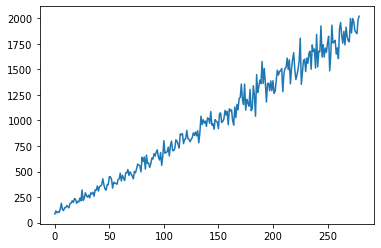

In [ ]:
def walk(n,p):
  start= random.randint(0,n-1)
  G= nx.erdos_renyi_graph(n,p)
  S= set()
  v= start
  count=0

  while len(S)<n:
    Nbr= list(nx.neighbors(G,v))
    v= random.choice(Nbr)
    S.add(v)
    count= count+1
  
  return count

# Number of random walks taken to cover the entire graph where number of nodes= i
l=[]
for i in range(20,300):
  z=[]
  for j in range(10):
    z.append(walk(i,0.3))
  l.append(np.average(z))
  #print(i,"-->",l[-1])

plt.plot(l)
plt.show()

## Page Rank Using Points Distribution Method


1. Create/Take a directed graph with 'n' nodes

2. Assign 100 points to each node
  points= initialize_points(G)

3. Keep distributing points until convergence

4. Get nodes' ranking as per the points accumulated

5. Compare the ranks thus obtained with the ranks obtained from the inbuilt Page Rank method.


In [ ]:
def add_edges(G, p):
  for i in G.nodes():
    for j in G.nodes():
      if i!=j:
        r= random.random()
        if r<=p:
          G.add_edge(i,j)
        else:
          continue
  return G

def initialize_points(G):
  points= [100 for i in range(G.number_of_nodes())]
  return points

def distribute_points(G, points):
  prev_points= points
  new_points= [0 for i in range(G.number_of_nodes())]

  for i in G.nodes():
    out= G.out_edges(i)
    if len(out)==0:
      new_points[i]+= prev_points[i]
    else:
      share= (float)(prev_points[i])/len(out)
      for each in out:
        new_points[each[1]]+= share
        
  return G, new_points

def keep_distributing_points(G,points):
  prev_points= points
  print("Enter # to stop")
  while(1):
    G, new_points= distribute_points(G, prev_points)
    print(new_points)

    char= input()
    if char=="#":
      break
    
    prev_points= new_points
  return G, new_points

def get_nodes_sorted_by_points(points):
  points_array= np.array(points)
  nodes_sorted_by_points= np.argsort(-points_array)
  return nodes_sorted_by_points

In [ ]:
def main():
  # 1. Create/Take a directed graph with 'n' nodes
  G= nx.DiGraph()
  G.add_nodes_from([i for i in range(10)])
  G= add_edges(G, 0.3)

  # 2. Assign 100 points to each node
  points= initialize_points(G)

  # 3. Keep distributing points until convergence
  G, points= keep_distributing_points(G,points)

  # 4. Get nodes' ranking as per the points accumulated
  nodes_sorted_by_points= get_nodes_sorted_by_points(points)
  print("Nodes_sorted_by_points : ",nodes_sorted_by_points)

  # 5. Compare the ranks thus obtained with the ranks obtained from the inbuilt Page Rank method.
  pr= nx.pagerank(G)
  pr_sorted= sorted(pr.items(), key= lambda x:x[1], reverse= True)
  for i in pr_sorted:
    print(i[0], end=" ")

In [ ]:
main()

Enter # to stop
[33.333333333333336, 100.0, 125.0, 25.0, 50.0, 208.33333333333334, 0, 100.0, 258.33333333333337, 100.0]

[33.333333333333336, 191.66666666666669, 112.5, 8.333333333333334, 12.5, 154.16666666666666, 0, 154.16666666666669, 204.16666666666666, 129.16666666666669]

[51.38888888888889, 158.33333333333331, 85.41666666666666, 8.333333333333334, 4.166666666666667, 255.55555555555557, 0, 108.33333333333333, 245.1388888888889, 83.33333333333333]

[36.11111111111111, 165.27777777777777, 140.625, 12.847222222222223, 4.166666666666667, 211.45833333333331, 0, 124.65277777777779, 175.0, 129.86111111111111]

[41.55092592592593, 157.8125, 114.75694444444443, 9.027777777777777, 6.423611111111112, 222.28009259259258, 0, 89.58333333333333, 250.7523148148148, 107.81249999999999]

[29.86111111111111, 182.75462962962962, 121.52777777777777, 10.387731481481483, 4.513888888888888, 202.5752314814815, 0, 128.58796296296296, 205.43981481481478, 114.35185185185185]

[42.86265432098765, 163.48379629

#### Our page rank value and networkx value may not be same due to following problems :
#### 1. Due to point sync - In the graph we generated, there may be a set of nodes having no outlinks. They tend to accumulate all the points. Due to which the ranking may not be accurate. But the networkx function handles these cases with accuracy.
#### 2. Two or mode nodes having exactly same page rank values.

#### Solution to problem 1 : After every iteration, gather a fraction of points(20%) from each node and then distribute them equally among all nodes.

In [ ]:
def add_edges(G, p):
  for i in G.nodes():
    for j in G.nodes():
      if i!=j:
        r= random.random()
        if r<=p:
          G.add_edge(i,j)
        else:
          continue
  return G

def initialize_points(G):
  points= [100 for i in range(G.number_of_nodes())]
  return points

def distribute_points(G, points):
  prev_points= points
  new_points= [0 for i in range(G.number_of_nodes())]

  for i in G.nodes():
    out= G.out_edges(i)
    if len(out)==0:
      new_points[i]+= prev_points[i]
    else:
      share= (float)(prev_points[i])/len(out)
      for each in out:
        new_points[each[1]]+= share
        
  return G, new_points

def handle_points_sink(G, points):
  for i in range(len(points)):
    points[i]= (float)(points[i])*0.8

  n= G.number_of_nodes()
  extra= ((float)(n)*100*0.2)/n

  for i in range(len(points)):
    points[i]+= extra
    
  return points

def keep_distributing_points(G,points):
  prev_points= points
  print("Enter # to stop")
  while(1):
    G, new_points= distribute_points(G, prev_points)
    print(new_points)

    new_points= handle_points_sink(G, new_points)

    char= input()
    if char=="#":
      break
    
    prev_points= new_points
  return G, new_points

def get_nodes_sorted_by_points(points):
  points_array= np.array(points)
  nodes_sorted_by_points= np.argsort(-points_array)
  return nodes_sorted_by_points

In [ ]:
def main():
  # 1. Create/Take a directed graph with 'n' nodes
  G= nx.DiGraph()
  G.add_nodes_from([i for i in range(10)])
  G= add_edges(G, 0.3)

  # 2. Assign 100 points to each node
  points= initialize_points(G)

  # 3. Keep distributing points until convergence
  G, points= keep_distributing_points(G,points)

  # 4. Get nodes' ranking as per the points accumulated
  nodes_sorted_by_points= get_nodes_sorted_by_points(points)
  print("Nodes_sorted_by_points : ",nodes_sorted_by_points)

  # 5. Compare the ranks thus obtained with the ranks obtained from the inbuilt Page Rank method.
  pr= nx.pagerank(G)
  pr_sorted= sorted(pr.items(), key= lambda x:x[1], reverse= True)
  for i in pr_sorted:
    print(i[0], end=" ")

In [ ]:
main()

Enter # to stop
[83.33333333333334, 100.0, 0, 83.33333333333334, 166.66666666666669, 33.333333333333336, 83.33333333333334, 133.33333333333334, 166.66666666666669, 150.0]

[98.88888888888889, 46.66666666666667, 0, 78.88888888888889, 144.44444444444446, 28.88888888888889, 105.55555555555556, 108.88888888888889, 197.7777777777778, 190.0]

[113.70370370370371, 43.111111111111114, 0, 61.70370370370371, 166.962962962963, 34.81481481481482, 116.81481481481484, 123.70370370370371, 189.18518518518522, 150.0]

[93.12098765432098, 47.851851851851855, 0, 64.23209876543211, 170.47901234567905, 37.81728395061729, 108.79506172839507, 103.12098765432098, 211.07160493827163, 163.51111111111115]

[99.19967078189303, 50.25382716049383, 0, 60.639670781893, 171.60625514403296, 35.67868312757202, 118.22386831275723, 109.19967078189303, 196.6176131687243, 158.58074074074077]

[96.26954183813443, 48.54294650205762, 0, 63.22144307270234, 169.9599890260631, 38.193031550068596, 111.48429080932785, 106.269541838

## Page Rank Using Random Walk Method

1. Create/Take a directed graph.
2. Perform a random walk.
3. Get sorted nodes as per points accumulated during random walk.
4. Compare with the inbuilt Page Rank method.

In [90]:
def add_edges(G, p):
  for i in G.nodes():
    for j in G.nodes():
      if i!=j:
        r= random.random()
        if r<=p:
          G.add_edge(i,j)
        else:
          continue
  return G

def random_walk(G):
  nodes= list(G.nodes())
  RW_points= [0 for i in range(G.number_of_nodes())]
  r= random.choice(nodes)
  RW_points[r]+=1
  out= list(G.out_edges(r))
  
  c=0
  while(c!=100000):
    if len(out)==0:
      focus= random.choice(nodes)
    else:
      r1= random.choice(out)
      focus= list(r1)[1]
    
    RW_points[focus]+=1
    out= list(G.out_edges(focus))
    c+=1
  return RW_points

def get_nodes_sorted_by_RW(RW_points):
  RW_points_array= np.array(RW_points)
  nodes_sorted_by_RW= np.argsort(-RW_points_array)
  return nodes_sorted_by_RW

In [93]:
def main():
  # 1. Create/Take a directed graph with 'n' nodes
  G= nx.DiGraph()
  G.add_nodes_from([i for i in range(10)])
  G= add_edges(G, 0.3)

  # 2. Perform a random walk.
  RW_points= random_walk(G)

  # 3. Get sorted nodes as per points accumulated during random walk.
  nodes_sorted_by_RW= get_nodes_sorted_by_RW(RW_points)
  print("Nodes_sorted_by_random_walk : ",nodes_sorted_by_RW)

  # 4. Compare with the inbuilt Page Rank method.
  pr= nx.pagerank(G)
  pr_sorted= sorted(pr.items(), key= lambda x:x[1], reverse= True)
  for i in pr_sorted:
    print(i[0], end=" ")

In [94]:
main()

Nodes_sorted_by_random_walk :  [5 6 1 2 9 8 3 4 0 7]
5 6 1 2 9 8 3 4 0 7 

## DegreeRank versus PageRank

In [107]:
def main():
  G= nx.read_edgelist("citation.txt", create_using= nx.DiGraph())

  deg= dict(G.in_degree())
  pr= nx.pagerank(G)

  pr_values= []

  for i in deg.keys():
    pr_values.append(pr[i])
  
  plt.plot(deg.values(), pr_values, 'bo', markersize= 2)
  plt.xlabel("Indegree of the nodes")
  plt.ylabel("Page Rank values of the nodes")

  plt.show()

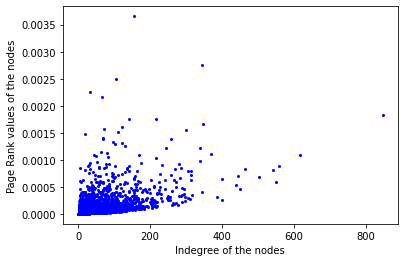

In [108]:
main()

* ### Since the graph is not linear we can conclude that Indegree and PageRank values are not correlated with eachothers in case of citation network.